В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



**Посилання на файл process_bank_churn.py в репозиторії на GitHub**:

https://github.com/AnnaH2303/ML_projects/blob/main/process_bank_churn.py

In [1]:
# Імпорт загальних бібліотек

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Зчитування даних

raw_df = pd.read_csv('./bank-customer-churn-prediction-dlu-course-c-2/train.csv')

# Задання початкових умов

drop_cols = ['id', 'CustomerId', 'Surname']
scaler_numeric = False

In [3]:
# Імпорт функції preprocess_data з process_bank_churn.py

%load_ext autoreload
%autoreload 2

from process_bank_churn import preprocess_data

In [4]:
data, input_cols, scaler, encoder = preprocess_data(raw_df, drop_cols, scaler_numeric)

In [5]:
X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [6]:
# Тренування дерева з зафіксованим random_state

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [7]:
# Функція для підрахунку метрики AUROC

def pred_auroc(model, inputs, targets, name = ''):

    # Predict probabilities
    pred_proba = model.predict_proba(inputs)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, threshold = roc_curve(targets, pred_proba, pos_label = 1)
    
    # Compute AUROC
    roc_auc = auc(fpr, tpr)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2%}")
  
    return roc_auc

In [8]:
# Оцінка моделі на тренувальних і валідаційних даних

roc_auc_train = pred_auroc(model, X_train, train_targets, 'Training')
roc_auc_val = pred_auroc(model, X_val, val_targets, 'Validation')

Area under ROC score on Training dataset: 100.00%
Area under ROC score on Validation dataset: 76.31%


**Висновок**:\
Модель перетренована.\
`AUROC` на тренувальних даних 100%, на валідаційних – 76%. Це говорить про те, що модель повністю підлаштувалась під дані, на яких вчилась (вона їх всі запам’ятала), і не здатна до генералізації.

In [9]:
# Виведення глибини дерева

print(f"Tree depth: {model.tree_.max_depth}.")

Tree depth: 25.


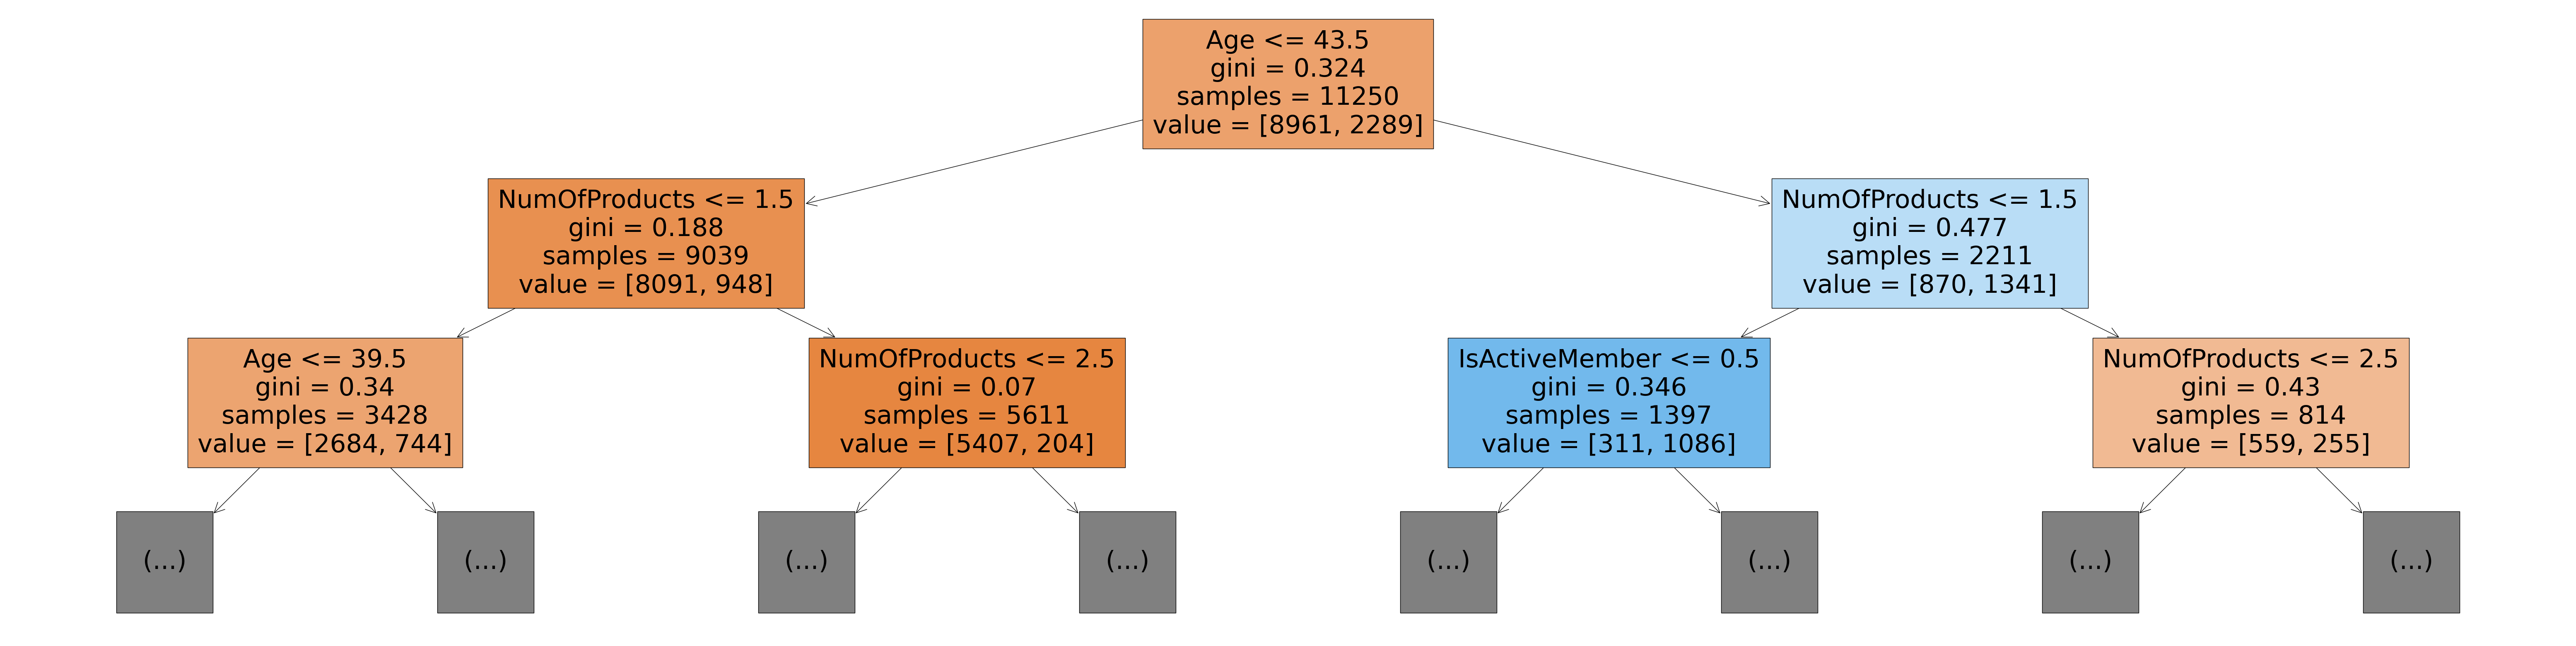

In [10]:
# Побудова дерева до глибини 2 включно

plt.figure(figsize = (80,20))
plot_tree(model, feature_names = X_train.columns, max_depth = 2, filled = True);

**Висновок**:\
Найвпливовішими ознаками є `Age`, `NumOfProducts`.

In [11]:
# Визначення топ 10 найвпливовіших ознак

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

importance_df.head(10)

,feature,importance
1,Age,0.346301
4,NumOfProducts,0.167947
7,EstimatedSalary,0.131605
0,CreditScore,0.117156
3,Balance,0.081201
2,Tenure,0.061639
6,IsActiveMember,0.033070
9,Geography_Germany,0.015503
5,HasCrCard,0.014113
11,Gender_Female,0.009814


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [12]:
def pred_auroc_adjust(mln, md):
    
    model = DecisionTreeClassifier(max_leaf_nodes = mln, max_depth = md, random_state = 42)
    model.fit(X_train,train_targets)
    roc_auc_train = pred_auroc(model, X_train, train_targets, 'Training')
    roc_auc_val = pred_auroc(model, X_val, val_targets, 'Validation')
    
    return roc_auc_train, roc_auc_val

In [13]:
pred_auroc_adjust(40, 7)

Area under ROC score on Training dataset: 92.89%
Area under ROC score on Validation dataset: 92.34%


(0.9289291751075689, 0.9233737194948315)

**Висновок**:\
В результаті ручних експериментів точність моделі на тренувальних даних знизилася, проте на валідаційних даних вона значно зросла.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [14]:
def max_depth_auc(md):
    
    model = DecisionTreeClassifier(max_depth = md, random_state = 42)
    model.fit(X_train, train_targets)
    
    pred_proba_train = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, threshold_train = roc_curve(train_targets, pred_proba_train, pos_label = 1)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    pred_proba_val = model.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, threshold_val = roc_curve(val_targets, pred_proba_val, pos_label = 1)
    roc_auc_val = auc(fpr_val, tpr_val)
    
    return {'max depth': md, 'auroc_train': roc_auc_train, 'auroc_val': roc_auc_val}

In [15]:
depths_df = pd.DataFrame([max_depth_auc(md) for md in range(1, 21)])
depths_df.style.background_gradient(subset = 'auroc_val', cmap = 'Blues')

,max depth,auroc_train,auroc_val
0,1,0.744379,0.737879
1,2,0.841958,0.848759
2,3,0.896683,0.893916
3,4,0.910752,0.912550
4,5,0.925483,0.919912
5,6,0.934095,0.916703
6,7,0.942308,0.915281
7,8,0.950853,0.902091
8,9,0.961036,0.870228
9,10,0.970164,0.850729


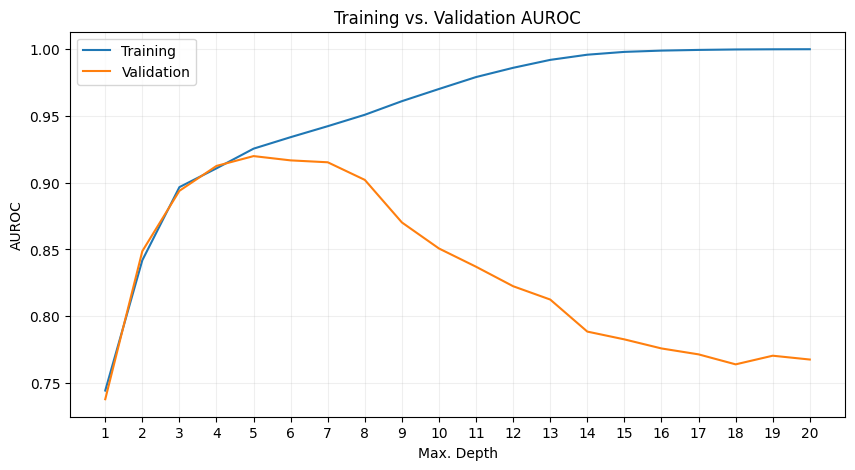

In [16]:
plt.figure(figsize = (10, 5))
plt.plot(depths_df['max depth'], depths_df['auroc_train'])
plt.plot(depths_df['max depth'], depths_df['auroc_val'])
plt.title('Training vs. Validation AUROC')
plt.xticks(range(1, 21, 1))
plt.xlabel('Max. Depth')
plt.ylabel('AUROC')
plt.legend(['Training', 'Validation'])
plt.grid(alpha = 0.2)
plt.show();

**Висновок**:\
Найкраще (найбільше) значення `AUROC` на валідаційних даних спостерігається для **`max_depth` = 5**. При подальому збільшенні `max_depth` відбувається перенавчання (для тренувальних даних `AUROC` продовжує зростати, але для валідаційних починає зменшуватись).

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [17]:
# Тренування моделі з найкращим значенням max_depth

model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [18]:
# Зчитування тестових даних

new_raw_df = pd.read_csv('./bank-customer-churn-prediction-dlu-course-c-2/test.csv')

In [19]:
# Імпорт функції preprocess_new_data з process_bank_churn.py для обробки тестового набору

from process_bank_churn import preprocess_new_data

In [20]:
# Обробка тестового набору

new_data  = preprocess_new_data(new_raw_df, drop_cols, scaler_numeric, scaler, encoder)

In [21]:
X_test = new_data['test_X']

In [22]:
# Знаходження передбачень на тестових даних, формування файлу submission

new_raw_df['Exited'] = model.predict_proba(X_test)[:, 1]

submission_df = pd.read_csv('./bank-customer-churn-prediction-dlu-course-c-2/sample_submission.csv')
submission_df.Exited = new_raw_df.Exited
submission_df.to_csv('submission.csv', index = False)